# Exploratory Analysis will Take Place Here #

In [17]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

### Reading SQLite with Pandas ###  
Pandas contains a `read_sql()` function that demands two parameters; `query` and `connection`. Instead of using that function alone, we define a new function, `table_to_df`, that takes the same parameters, but then converts any `time` columns from `string` to `datetime`. This will help with any analysis over time when we try to visualize our data later.

In [18]:
def table_to_df(query, connection):
    df = pd.read_sql(query, connection)
    if "time" in df.columns:
        df["time"] = pd.to_datetime(df["time"])
    return df

In [19]:
conn = sqlite3.connect("data.db")
command_query = "SELECT * FROM command_use"
commands = table_to_df(command_query, conn)

message_query = "SELECT * FROM chat_messages"
messages = table_to_df(message_query, conn)

### Bar Graph: Command Usage by User ###  
  
This cell displays a bar graph of every chatter and the number of times they used a command. Viewers that did not chat do no appear in the plot (sorry lurkers), nor do chatters that didn't use any commands. If you only want to take the top `n` users, simply un-comment out the `[:n]` from the `order` parameter of `sns.countplot()` and replace the `n` with your desired number of users.

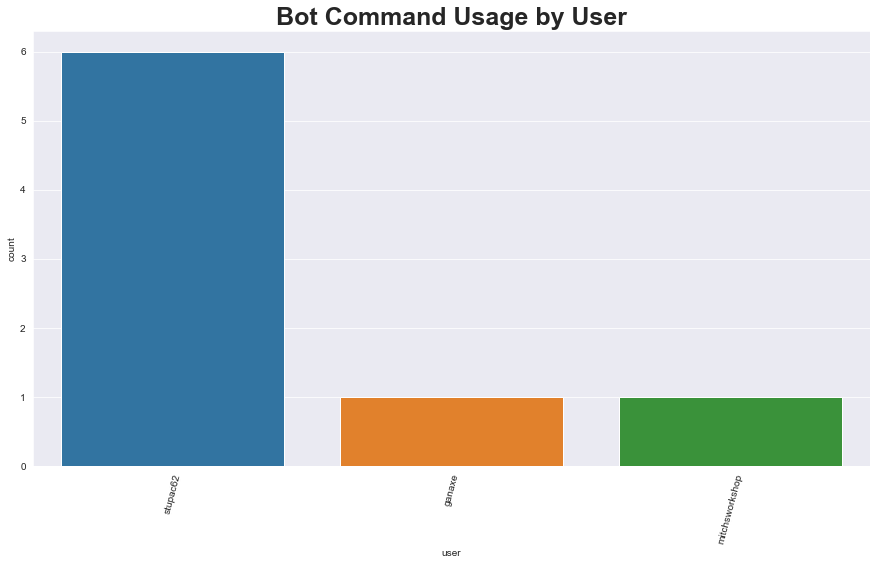

In [20]:
plt.figure(figsize=(15,8))
plt.tight_layout()
ax = sns.countplot(
    x = "user",
    data = commands,
    order = commands["user"].value_counts().index # [:n] # for top n scorers
)
ax.set_title("Bot Command Usage by User", fontsize = 25, fontweight = "bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)
plt.savefig("data_viz/command_use_by_user.png", bbox_inches = "tight")
plt.show()

### Bar Graph: Total Command Usage ###  
  
This bar graph shows total command use, regardless of user. As with the last graph, if you only want the top `n` commands, un-comment out the `[:n]` from the `order` parameter of `sns.countplot()`, and replace `n` with the desired number of command scores to visualize.

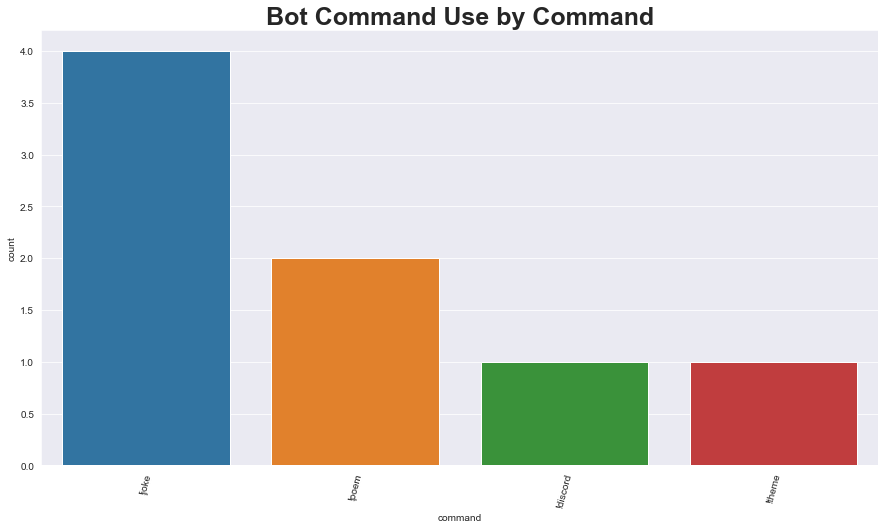

In [21]:
plt.figure(figsize=(15,8))
ax = sns.countplot(
    x = "command",
    data = commands,
    order = commands["command"].value_counts().index # [:n] # for top n scorers
)
ax.set_title("Bot Command Use by Command", fontsize = 25, fontweight = "bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)
plt.savefig("data_viz/command_use_total.png", bbox_inches = "tight")
plt.show()

### Bar Graph: Total Chat Messages by User ###  
  
This graph shows the number of messages sent by each user. Again, non-chatters are not taken into consideration. This time, messages are counted even if a command is not used. As always, if you only want to top `n` chatters, un-comment out `[:n]` from the `order` parameter of `sns.countplot()`, and replace `n` with the desired number of chatters.

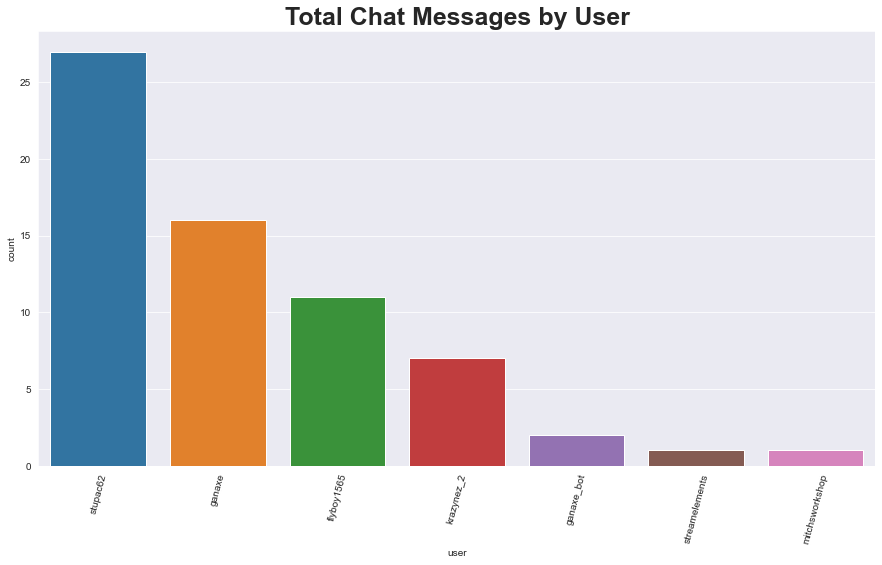

In [22]:
plt.figure(figsize=(15,8))
ax = sns.countplot(
    x = "user",
    data = messages,
    order = messages["user"].value_counts().index # [:n] # for top n scorers
)
ax.set_title("Total Chat Messages by User", fontsize = 25, fontweight = "bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)
plt.savefig("data_viz/top_chatters.png", bbox_inches = "tight")
plt.show()